## Example from [Fitch2019]

In [1]:
%run ../imports.py

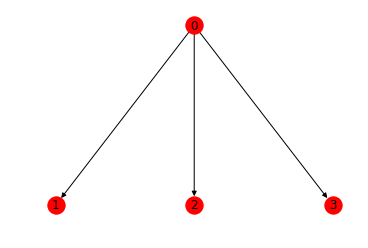

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (0,2),
    (0,3)
])
N = nx.number_of_nodes(G)
plt.axis('off')
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

1

### Symmetrization

In [4]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [5]:
Q

matrix([[ 0.866 , -0.2887, -0.2887, -0.2887]])

Create undirected graph from the equivalent Laplacian

In [6]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [7]:
eqL

matrix([[ 2.25, -0.75, -0.75, -0.75],
        [-0.75,  0.25,  0.25,  0.25],
        [-0.75,  0.25,  0.25,  0.25],
        [-0.75,  0.25,  0.25,  0.25]])

In [8]:
np.linalg.matrix_rank(eqL)

1

In [9]:
posG, negG = separate_graphs(eqL)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


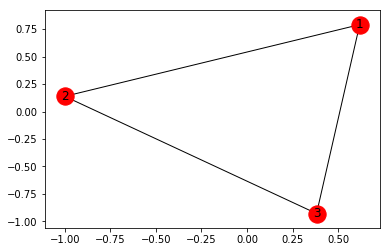

In [10]:
nx.draw_networkx(negG)

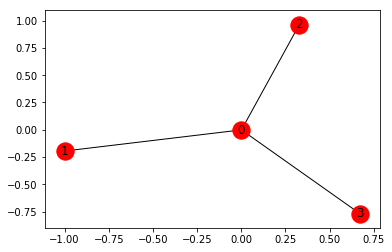

In [11]:
nx.draw_networkx(posG)

In [12]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [13]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [14]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([7.5000e-01, 5.5511e-17, 7.5000e-01]),
 matrix([[ 0.8165, -0.5774, -0.1101],
         [-0.4082, -0.5774, -0.6456],
         [-0.4082, -0.5774,  0.7557]]))

In [15]:
nx.laplacian_matrix(g_neg).todense()

matrix([[ 0.5 , -0.25, -0.25],
        [-0.25,  0.5 , -0.25],
        [-0.25, -0.25,  0.5 ]])

In [16]:
np.divide(x,eqL)

matrix([[0.1111, 0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111, 0.1111]])

In [17]:
L

matrix([[ 3, -1, -1, -1],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]], dtype=int64)

In [18]:
eqL

matrix([[ 2.25, -0.75, -0.75, -0.75],
        [-0.75,  0.25,  0.25,  0.25],
        [-0.75,  0.25,  0.25,  0.25],
        [-0.75,  0.25,  0.25,  0.25]])